In [1]:
import numpy as np #numpy
import pandas as pd #pandas
import seaborn as sns #seaborn
import matplotlib.pyplot as plt #matplotlib
%matplotlib inline
import plotly.express as px #plotly
#All the libraries which will be used while making model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics



In [2]:
df=pd.read_csv("credit_card_defaulter.csv")

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [5]:
df.shape

(10000, 5)

In [6]:
df.columns

Index(['Unnamed: 0', 'default', 'student', 'balance', 'income'], dtype='object')

In [7]:
df.isna().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

Our data is clean so there is no need of imputation.

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True) #dropping unamed: 0 because its just telling the row number

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308387,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462905,34552.644800,43807.729275,73554.233500


In [11]:
df.duplicated().sum() #Finding the duplicate values

0

In [12]:
# checking categorical and numerical values
num=df.select_dtypes(include=np.number).columns.tolist()
cat=df.select_dtypes(include='object').columns.tolist()
print("Numerical Columns:",num)
print("Categorical Columns:",cat)

Numerical Columns: ['balance', 'income']
Categorical Columns: ['default', 'student']


# Checking correlation

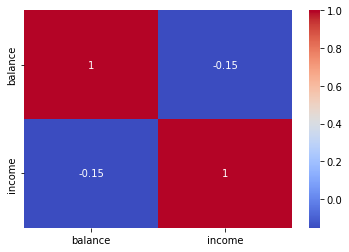

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

As there are only 2 attributes so they are strongly correlated with itself only.

#Distribution of Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


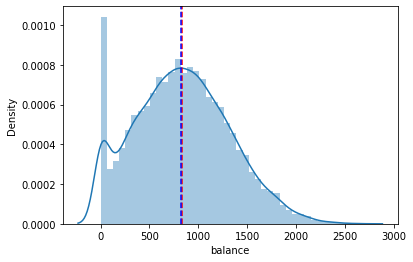

In [14]:
sns.distplot(df.balance)
plt.axvline(df.balance.mean(),color='r',ls='--')
plt.axvline(df.balance.median(),color='blue',ls='--')
plt.show()

We can see that mean is greater than median so balance is right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


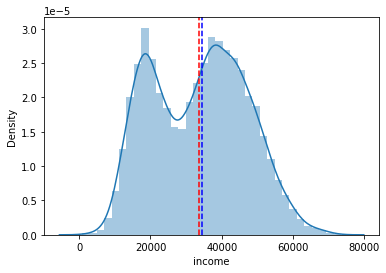

In [15]:
sns.distplot(df.income)
plt.axvline(df.income.mean(),color='r',ls='--')
plt.axvline(df.income.median(),color='blue',ls='--')
plt.show()

In [16]:
figure=px.pie(values=df.balance,names=df.student)
figure.show()

We can conclude that 34.8% are the students while 65.2% are not students.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



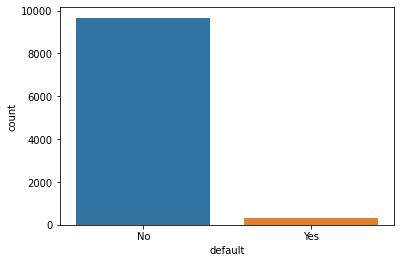

In [17]:
sns.countplot(df.default)
plt.show()

We can see that aprrox 9500 dont have credit card and 200-300 are having credit card as default.

# Checking the Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



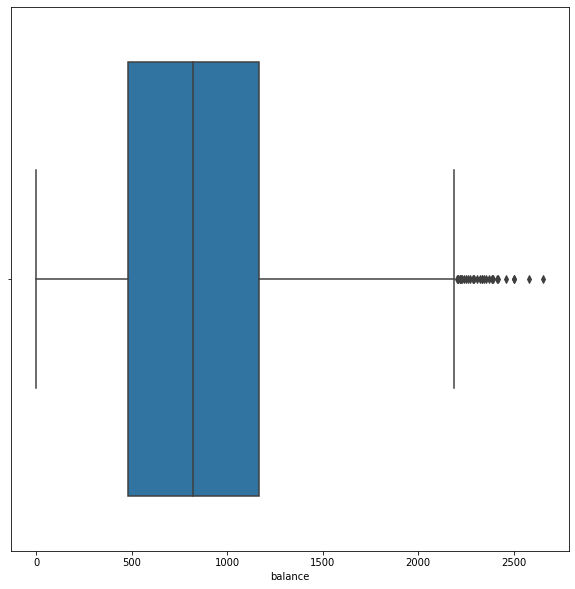

In [18]:
plt.figure(figsize=(10,10)) # Increasing the figuresize if there will be any outliers then it can be easily visible
sns.boxplot(df.balance)

We can see that there are outliers in the balance. Balance>2100 are the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



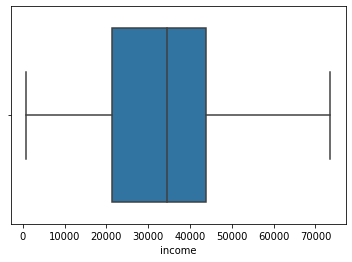

In [19]:
sns.boxplot(df.income)

We can see that there are not points outside lower bound and upper bound therefore there are no outliers.

# Treatment Of Outliers

Trimming the outliers



In [20]:
df=df[(df['balance']>=0) & (df['balance']<2100)] #removing all the outliers beyond balance>2100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



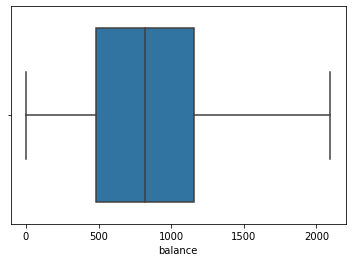

In [21]:
sns.boxplot(df.balance)

Now, We can see that there are no outliers in the balance.

In [22]:
# Encoding of categorical Values
label=preprocessing.LabelEncoder()
df['student']=label.fit_transform(df['student'])
df['default']=label.fit_transform(df['default'])

In [23]:
input_cols = list(df.columns)[1:] # independent features
target_col = 'default' #Dependent feature

In [24]:
X = df[input_cols]
y = df[target_col]

In [25]:
# splitting our dataset into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train.shape #shape of train dataset

(6958, 3)

In [27]:
X_test.shape # shape of test dataset

(2983, 3)

In [28]:
y_train.shape, y_test.shape

((6958,), (2983,))

In [29]:
# Scaling using standard scaler method
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)


## Random Forest

In [30]:
model2=RandomForestClassifier(n_estimators=130,random_state=90,n_jobs=-1)
model2.fit(X_train_sc,y_train)
prediction_train = model2.predict(X_train_sc)
prediction_test = model2.predict(X_test_sc)
model2.score(X_test_sc,prediction_test)

1.0

100 percent accuracy due to less adequate data.

In [31]:
conf=confusion_matrix(y_test,prediction_test)

In [32]:
conf

array([[2884,   26],
       [  58,   15]])

Text(33.0, 0.5, 'Predicted label')

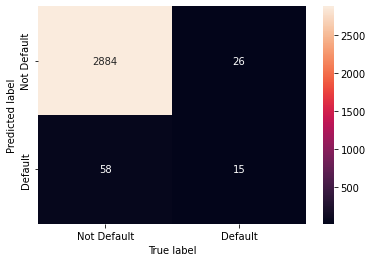

In [33]:
sns.heatmap(conf,annot=True,fmt='g',xticklabels = ["Not Default", "Default"] , yticklabels = ["Not Default", "Default"])
plt.xlabel('True label')
plt.ylabel('Predicted label')

From above confusion matrix we can concluded:

-->2884 are the values which are predicted as not default and actually are not default means they are true negative


--> 15 are predicted as default and actually they are defualt which means it is true positive.

In [34]:
print(metrics.classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2910
           1       0.37      0.21      0.26        73

    accuracy                           0.97      2983
   macro avg       0.67      0.60      0.62      2983
weighted avg       0.97      0.97      0.97      2983



As there is less data thats why the recall and precision for not default is high and precison is slow. Overall Accuracy came to be 97%.

In [35]:
auc_score = metrics.roc_auc_score( y_test, prediction_test  )
round( float( auc_score ), 2 )

0.6

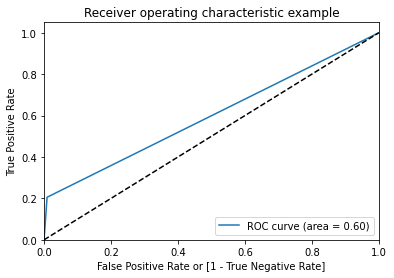

In [36]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( y_test,
                                     prediction_test,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


AUC is 60% it means our model Random Forest is not good.We can't say that our model is giving the better result.It is giving little bit better than guessing the values.

# XGB Boost Classifier

In [37]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42, n_jobs=-2, n_estimators=10, max_depth=14, use_label_encoder=False)
xgb.fit(X_train_sc,y_train)

XGBClassifier(max_depth=14, n_estimators=10, n_jobs=-2, random_state=42,
              use_label_encoder=False)

In [38]:
prediction_tst=xgb.predict(X_test_sc)

In [39]:
xgb.score(X_test_sc,prediction_test)

0.9929601072745559

In [40]:
auc_score = metrics.roc_auc_score( y_test, prediction_tst  )


In [41]:
auc_score

0.6472485053900109

Conclusion:

As there was no missing values so there was no need of imputation but there were outliers in the dataset which can affect the accuracy because they will increase the residuals.We removed them.

Performance Of the Models:
--> In Random Forest The Accuracy came 97% which is high but we did not have so much features in the dataset.It could be the reason of high accuracy but the auc score is very low which says that our model is is not performing which it should perform good if we see the accuracy.It is perform somewhat good.


--> XGboost- The accuracy and auc score both increased as we know this algorith uses boosting techniques.This works on residuals which means in every model some residual/error is reduced by giving the more preference of the residual of the missclassified attributes But in this also auc score did not come good. This is happening just because of less attributes in the dataset.